In [18]:
### This Jupyter Notebook visualises the link between rainfall data and sensor data and how these datasets demonstrate an effect on water quality

import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:

old_sensor_df = pd.read_csv('./datafiles/Watershed_conduc_sal_2019.csv', delimiter=',')
old_sensor_df['period']= old_sensor_df["Date"].map(str) + old_sensor_df["Time"].map(str)


rainfall_df = pd.read_csv('./datafiles/CliftonOakfld_0106to310819.csv', delimiter=',')
#rainfall_df = pd.read_csv('./datafiles/total_rainfall.csv', delimiter=',')
rainfall_df['period']= rainfall_df["Date"].map(str) + rainfall_df["Time"].map(str)





In [25]:
sensor_raindf = pd.merge(rainfall_df, old_sensor_df, on = 'period', how='inner')
print(sensor_raindf)


          Date_x    Time_x  Value[mm]              period      Date_y  \
0     2019-07-23  14:00:00        0.0  2019-07-2314:00:00  2019-07-23   
1     2019-07-23  14:15:00        0.0  2019-07-2314:15:00  2019-07-23   
2     2019-07-23  14:30:00        0.0  2019-07-2314:30:00  2019-07-23   
3     2019-07-23  14:45:00        0.0  2019-07-2314:45:00  2019-07-23   
4     2019-07-23  15:00:00        0.0  2019-07-2315:00:00  2019-07-23   
5     2019-07-23  15:15:00        0.0  2019-07-2315:15:00  2019-07-23   
6     2019-07-23  15:30:00        0.0  2019-07-2315:30:00  2019-07-23   
7     2019-07-23  15:45:00        0.0  2019-07-2315:45:00  2019-07-23   
8     2019-07-23  16:00:00        0.0  2019-07-2316:00:00  2019-07-23   
9     2019-07-23  16:15:00        0.0  2019-07-2316:15:00  2019-07-23   
10    2019-07-23  16:30:00        0.0  2019-07-2316:30:00  2019-07-23   
11    2019-07-23  16:45:00        0.0  2019-07-2316:45:00  2019-07-23   
12    2019-07-23  17:00:00        0.0  2019-07-2317

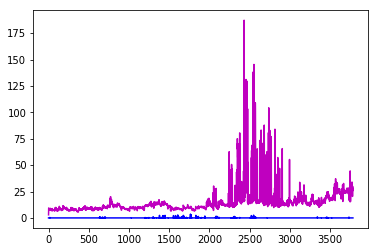

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(sensor_raindf['Value[mm]'], 'b')
ax.plot(sensor_raindf['Turbidity FNU'], 'm')
#ax.set_xlim(1000,2000)

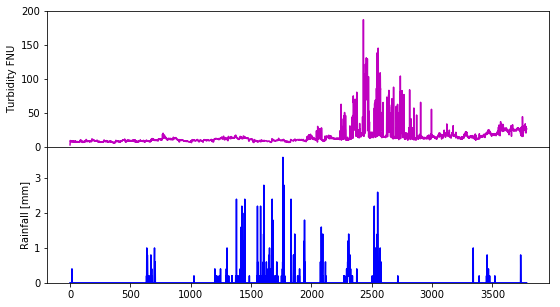

In [31]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(9,5))
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

# Plot each graph, and manually set the y tick values
axs[0].plot(sensor_raindf['Turbidity FNU'], 'm')
axs[0].set_ylabel('Turbidity FNU')
#axs[0].set_yticks(np.arange(-0.9, 1.0, 0.4))
axs[0].set_ylim(0, 200)

axs[1].plot(sensor_raindf['Value[mm]'], 'b')
#axs[1].set_yticks(np.arange(0.1, 1.0, 0.2))
axs[1].set_ylabel('Rainfall [mm]')
axs[1].set_ylim(0, 3.9)


plt.show()
fig.savefig('sensor_vs_rainfall.png')